An 80-20 training-test split is used to train the classifiers on the features extracted from the windowed data.

## Simple Classifiers 
The following are the confusion matrices of various simple ML classifiers (sklearn) on the data. 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os
os.chdir("..") 
from scripts.train_and_test import load_and_preprocess_data, train_sklearn_classifiers, train_pytorch_classifiers, print_results
data_path = r"C:\Users\chloe\OneDrive\Desktop\materials classification\features_dataset.csv"

X_train_scaled, X_test_scaled, y_train, y_test, n_features, n_classes, label_encoder = load_and_preprocess_data(data_path)

sklearn_results = train_sklearn_classifiers(X_train_scaled, X_test_scaled, y_train, y_test)

pytorch_results = train_pytorch_classifiers(
    X_train_scaled, X_test_scaled, y_train, y_test, n_features, n_classes
)

all_results = {**sklearn_results, **pytorch_results}
print_results(all_results)


Data shape: (7250, 30)
Num classes: 7
Classes: ['Al' 'Cu' 'FEP' 'PE' 'PET' 'PI' 'Paper']

Train set: 5800 samples
Test set: 1450 samples

SVM Accuracy: 0.6234
KNN Accuracy: 0.9166
Logistic Regression Accuracy: 0.5193
Random Forest Accuracy: 0.9676
Decision Tree Accuracy: 0.8731
Simple NN (64) Accuracy: 0.8021
Medium NN (128-64) Accuracy: 0.9028
Deep NN (256-128-64) Accuracy: 0.7772

Model Accuracies:
  Random Forest                 : 0.9676
  KNN                           : 0.9166
  Medium NN (128-64)            : 0.9028
  Decision Tree                 : 0.8731
  Simple NN (64)                : 0.8021
  Deep NN (256-128-64)          : 0.7772
  SVM                           : 0.6234
  Logistic Regression           : 0.5193


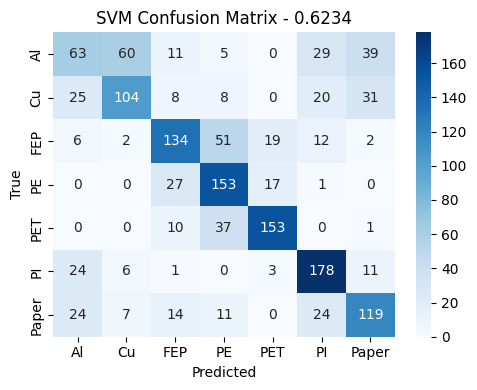

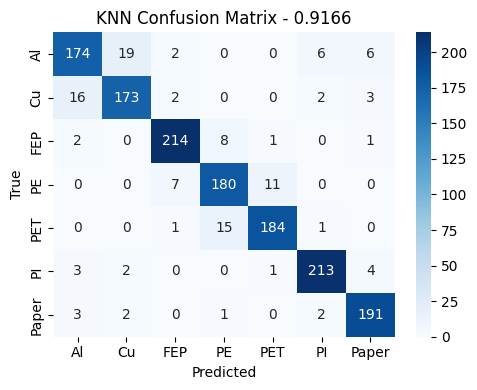

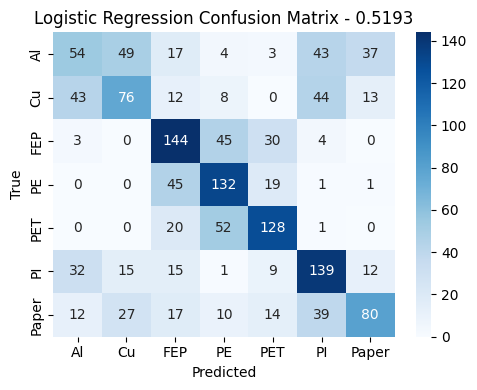

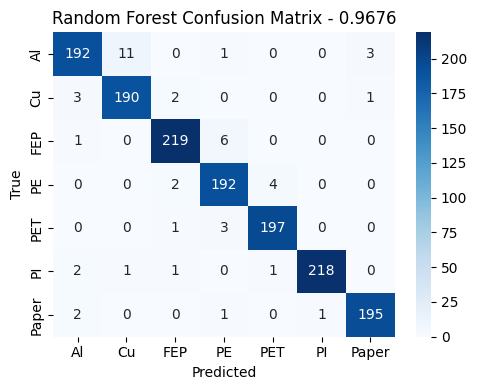

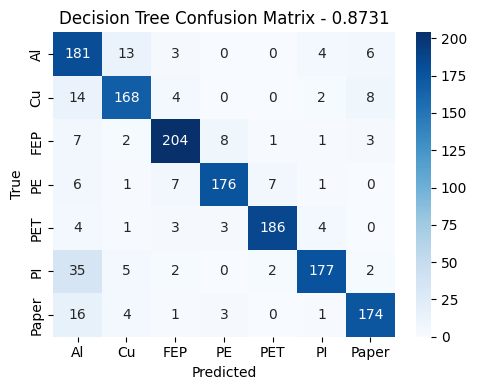

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

class_names = label_encoder.classes_

for name, metrics in sklearn_results.items():
    cm = metrics.get("confusion_matrix")
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=class_names, yticklabels=class_names)
    acc = metrics.get("accuracy", None)
    plt.title(f"{name} Confusion Matrix - {acc:.4f}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.tight_layout()
    plt.show()

## Neural Networks
The following are the learning curves and confusion matrices for various neural networks (PyTorch). 

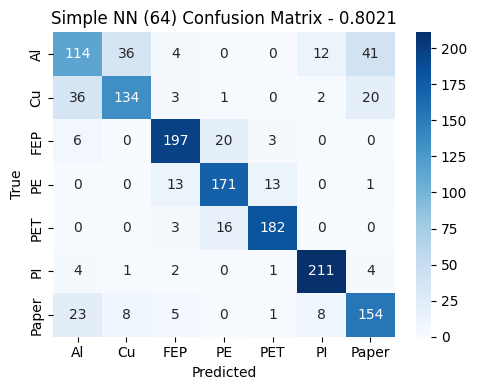

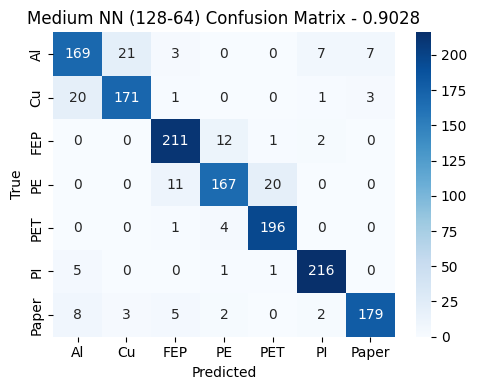

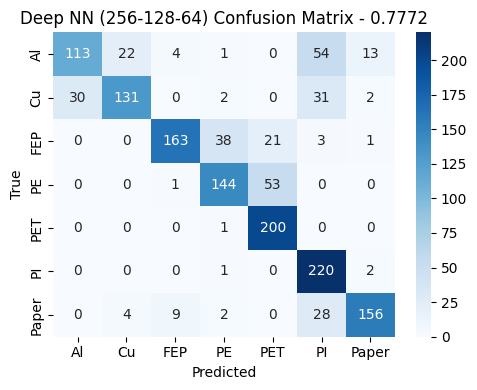

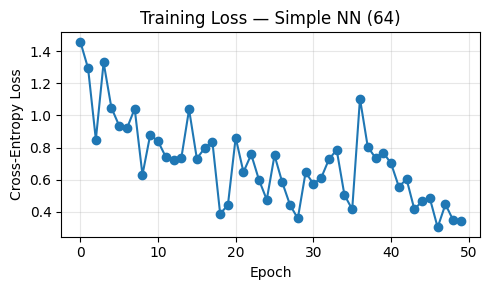

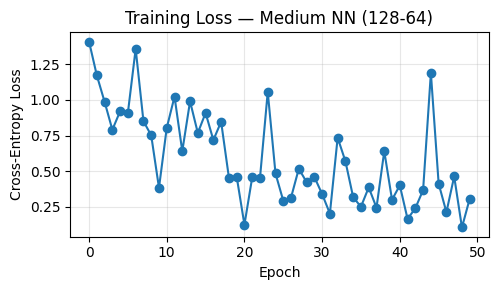

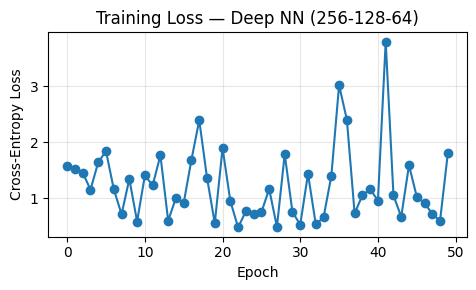

In [3]:
for name, metrics in pytorch_results.items():
    cm = metrics.get("confusion_matrix")
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=class_names, yticklabels=class_names)
    acc = metrics.get("accuracy", None)
    plt.title(f"{name} Confusion Matrix - {acc:.4f}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.tight_layout()
    plt.show()

# Learning curves (only for PyTorch models)
for name, metrics in pytorch_results.items():
    loss_hist = metrics.get("loss_history")
    if not loss_hist:
        continue

    plt.figure(figsize=(5, 3))
    plt.plot(loss_hist, marker="o")
    plt.title(f"Training Loss — {name}")
    plt.xlabel("Epoch")
    plt.ylabel("Cross-Entropy Loss")
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()